In [1]:
#IMPORT CIFAR DATASET
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 69s 0us/step


In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test=y_test.reshape(-1,)

In [11]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

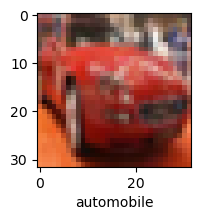

In [17]:
plot_sample(X_train,y_train,5)

In [18]:
X_train=X_train/255.0
X_test=X_test/255.0

In [29]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [30]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [31]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4474 - accuracy: 0.4801
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1195 - accuracy: 0.6061
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9935 - accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9138 - accuracy: 0.6833
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8456 - accuracy: 0.7049
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7913 - accuracy: 0.7249
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7456 - accuracy: 0.7423
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7040 - accuracy: 0.7553
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6659 - accuracy: 0.7684
Epoch 10/10
1563/1563 [==============================] - 27s 17m

In [32]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8868 - accuracy: 0.7101


[0.8867618441581726, 0.710099995136261]

In [33]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[1.02805222e-06, 1.07643734e-06, 8.60128512e-06, 9.28359687e-01,
        1.10409410e-05, 6.13977015e-02, 1.79163460e-03, 1.27595411e-06,
        8.42624251e-03, 1.63454320e-06],
       [2.78909528e-03, 5.13208623e-04, 2.07335233e-08, 3.94882349e-08,
        8.71419215e-10, 1.76855031e-09, 7.29532268e-11, 3.59087848e-09,
        9.96644020e-01, 5.35901381e-05],
       [8.65066573e-02, 4.51999381e-02, 7.01432116e-04, 2.76941480e-03,
        1.10210211e-04, 2.77301035e-04, 4.53006942e-04, 7.20317883e-04,
        8.51932585e-01, 1.13291005e-02],
       [9.79644775e-01, 6.59548969e-05, 1.77929946e-03, 2.04903172e-05,
        2.33256447e-04, 1.39454897e-07, 7.03551414e-05, 1.04621267e-05,
        1.81735605e-02, 1.85958311e-06],
       [1.25127846e-08, 3.40498991e-05, 1.09008071e-03, 3.26387845e-02,
        3.32289129e-01, 8.45667254e-03, 6.25487506e-01, 1.53729593e-06,
        2.32873981e-06, 8.16178414e-09]], dtype=float32)

In [34]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

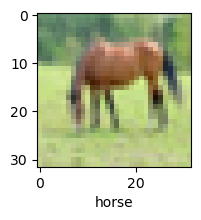

In [36]:
plot_sample(X_test,y_test,60)

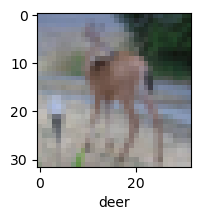

In [37]:
plot_sample(X_test,y_test,100)

In [39]:
classes[y_classes[100]]

'deer'